In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from scipy import stats


df = pd.read_csv (r'diabetes (2).csv')
print (df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [31]:
df=df.drop(columns=['SkinThickness'])

In [32]:
df.describe()

Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      3.845052  120.894531      69.105469   79.799479   31.992578   
std       3.369578   31.972618      19.355807  115.244002    7.884160   
min       0.000000    0.000000       0.000000    0.000000    0.000000   
25%       1.000000   99.000000      62.000000    0.000000   27.300000   
50%       3.000000  117.000000      72.000000   30.500000   32.000000   
75%       6.000000  140.250000      80.000000  127.250000   36.600000   
max      17.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


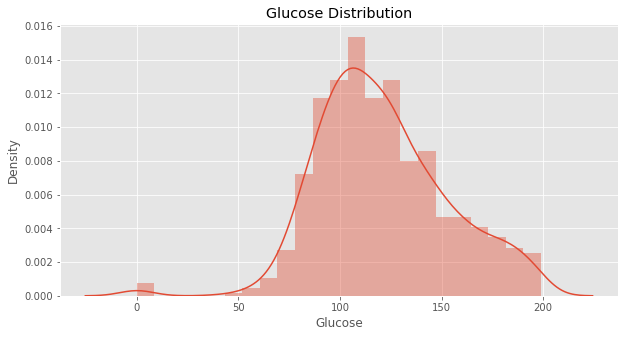

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Glucose Distribution')
sns.distplot(df['Glucose'])
plt.show()

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


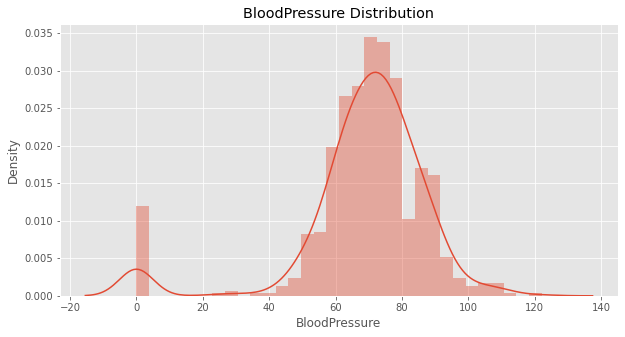

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BloodPressure Distribution')
sns.distplot(df['BloodPressure'])
plt.show()

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


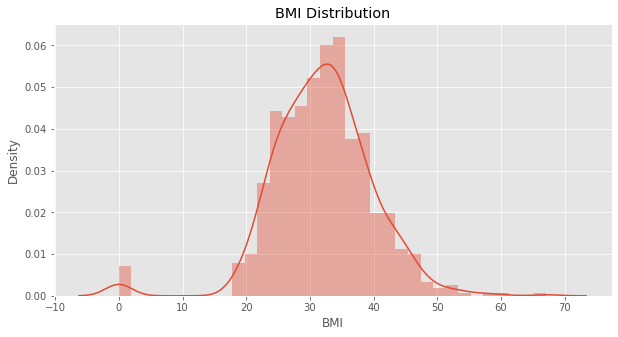

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution')
sns.distplot(df['BMI'])
plt.show()

/Users/lixiaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


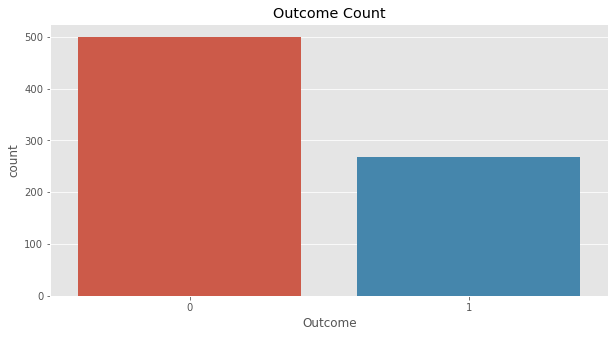

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Outcome'])
plt.title('Outcome Count')
plt.show()

In [37]:
colors = ['pink', 'blue']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

NameError: name 'go' is not defined

In [38]:
corr = df.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
BloodPressure               0.065068
Name: Outcome, dtype: float64

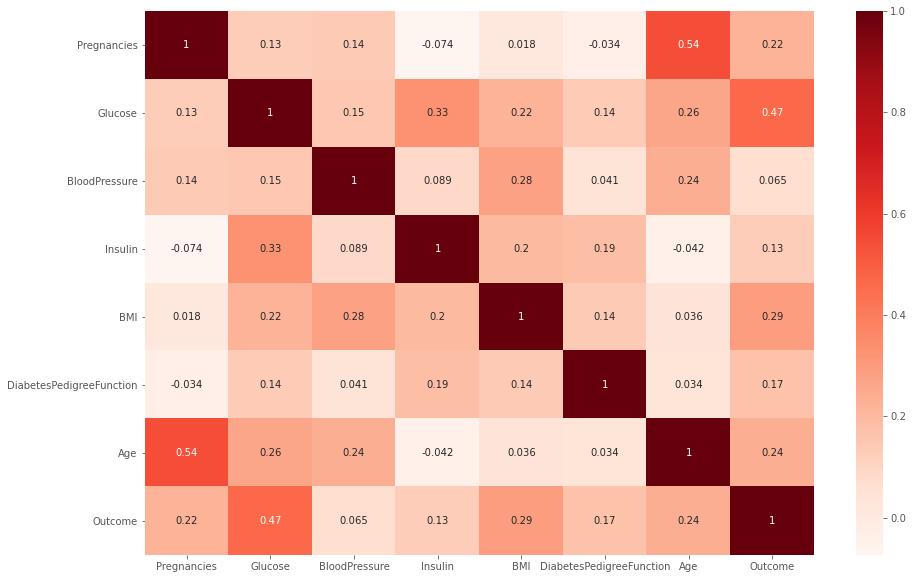

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

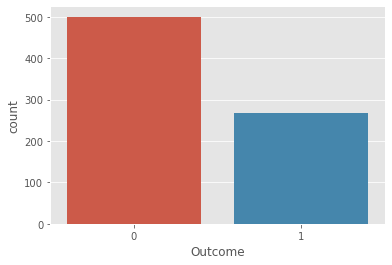

In [40]:
sns.countplot(x="Outcome", data=df)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

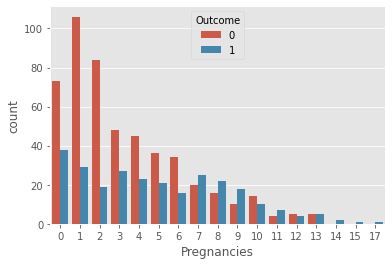

In [41]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=df)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

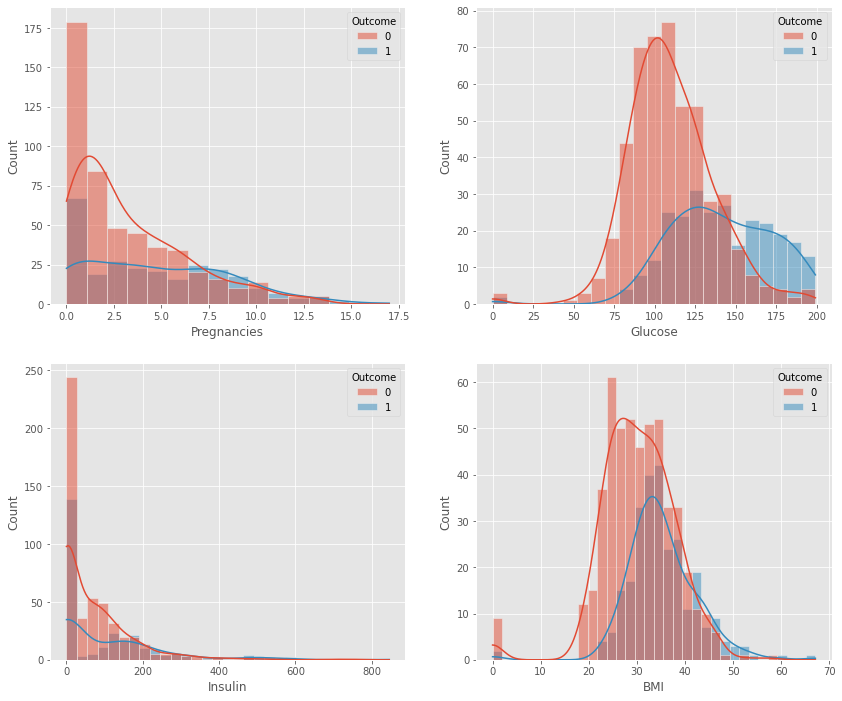

In [42]:
fig, ax = plt.subplots(2,2, figsize=(14,12))
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True,ax=ax[0,0])
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True,ax=ax[0,1]) 
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True,ax=ax[1,0]) 
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True,ax=ax[1,1])

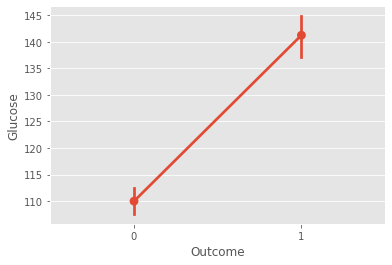

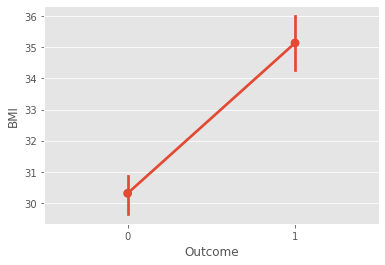

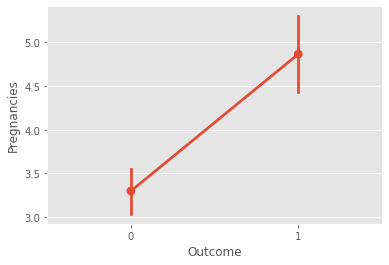

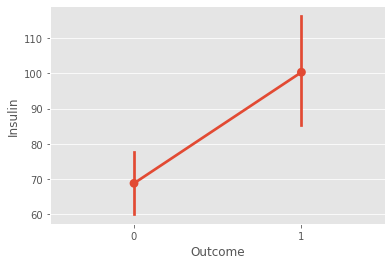

In [43]:
for i in ['Glucose','BMI', 'Pregnancies','Insulin']:
    sns.pointplot(x='Outcome', y= i, data=df) 
    plt.show()

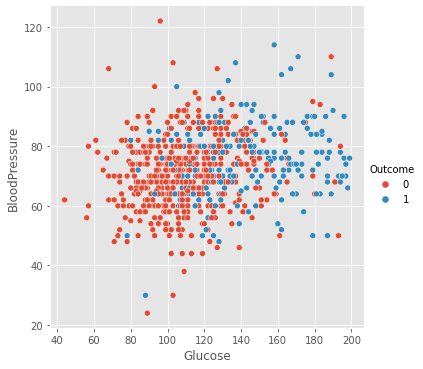

In [44]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

sns.relplot(x = "Glucose", y = "BloodPressure", hue = "Outcome", data = df_new)

Text(0, 0.5, 'Observations')

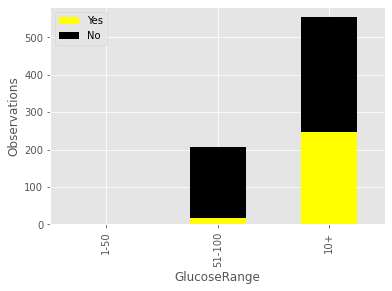

In [45]:
df['GlucoseRange']=pd.cut(df.Glucose,bins=[0,50,100,200],labels=['1-50','51-100','10+'])
total=df.groupby('GlucoseRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('GlucoseRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.GlucoseRange
total.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red'])
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

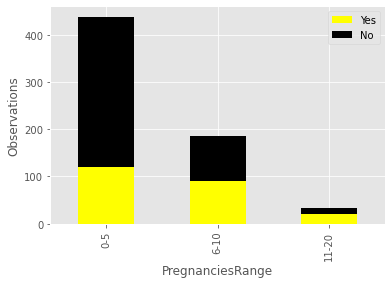

In [46]:
df['PregnanciesRange']=pd.cut(df.Pregnancies,bins=[0,5,10,20],labels=['0-5','6-10','11-20'])
total=df.groupby('PregnanciesRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('PregnanciesRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.PregnanciesRange
total.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red'])
plt.ylabel('Observations')

In [47]:
stats.f_oneway(df['Outcome'][df['PregnanciesRange'] == '0-5'],
               df['Outcome'][df['PregnanciesRange'] == '6-10'],
               df['Outcome'][df['PregnanciesRange'] == '11-20'])

F_onewayResult(statistic=19.32319190384053, pvalue=7.0248964225472404e-09)

In [60]:
example1 = df[df.Outcome == 1].Insulin
example2 = df[df.Outcome == 0].Insulin


tStat1, pVal1 = stats.ttest_ind(example1,example2,equal_var = False)

print("P-value: {0} T-statistics: {1}".format(pVal1, tStat1))

P-value: 0.0010469286528313425 T-statistics: 3.3008947714793337


Text(0, 0.5, 'Observations')

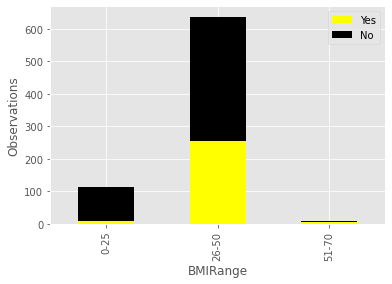

In [48]:
df['BMIRange']=pd.cut(df.BMI,bins=[0,25,50,70],labels=['0-25','26-50','51-70'])
total=df.groupby('BMIRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('BMIRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.BMIRange
total.plot(kind='bar', stacked=True, color=['yellow', 'black', 'red'])
plt.ylabel('Observations')

In [49]:
y=df['Outcome']
X=df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction']]

In [50]:
ols = sm.OLS(y,X).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.458
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              128.8
Date:                Tue, 12 Apr 2022   Prob (F-statistic):                    7.50e-99
Time:                        19:46:11   Log-Likelihood:                         -450.53
No. Observations:                 768   AIC:                                      911.1
Df Residuals:                     763   BIC:                                      934.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [51]:
from statsmodels.formula.api import ols

In [52]:
model=ols(formula='Outcome~Pregnancies+Age+BloodPressure+Insulin+BMI+DiabetesPedigreeFunction+C(GlucoseRange)',data=df)


In [53]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     29.58
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.60e-40
Time:                        19:46:16   Log-Likelihood:                -412.98
No. Observations:                 763   AIC:                             844.0
Df Residuals:                     754   BIC:                             885.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5995      0.425     -1.410      0.159      -1.434       0.235
C(GlucoseRange)[T.51-100]     0.1042      0.420      0.248      0.804      -0.719       0.928
C(GlucoseRange)[T.10+]        0.3845      0.419      0.917      0.359      -0.438       1.207
Pregnancies                   0.0206      0.005      3.832      0.000       0.010       0.031
Age                           0.0047      0.002      2.946      0.003       0.002       0.008
BloodPressure                -0.0024      0.001     -2.876      0.004      -0.004      -0.001
Insulin                       0.0001      0.000      0.963      0.336      -0.000       0.000
BMI                           0.0149      0.002      7.265      0.000       0.011       0.019
DiabetesPedigreeFunction      0.1785      0.047      3.812      0.000       0.087       0.270
==============================================================================
Omnibus:                      369.196   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.830
Skew:                           0.269   Prob(JB):                     9.17e-12
Kurtosis:                       1.856   Cond. No.                     7.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model=ols(formula='Outcome~BloodPressure+C(GlucoseRange)+C(BMIRange)+Insulin+C(PregnanciesRange)',data=df)

In [55]:
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     18.95
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.21e-25
Time:                        19:46:22   Log-Likelihood:                -368.49
No. Observations:                 644   AIC:                             755.0
Df Residuals:                     635   BIC:                             795.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0201      0.436     -0.046      0.963      -0.877       0.837
C(GlucoseRange)[T.51-100]       -0.1431      0.435     -0.329      0.742      -0.997       0.710
C(GlucoseRange)[T.10+]           0.1410      0.435      0.324      0.746      -0.713       0.995
C(BMIRange)[T.26-50]             0.2335      0.049      4.746      0.000       0.137       0.330
C(BMIRange)[T.51-70]             0.5932      0.222      2.676      0.008       0.158       1.029
C(PregnanciesRange)[T.6-10]      0.1749      0.039      4.478      0.000       0.098       0.252
C(PregnanciesRange)[T.11-20]     0.2496      0.078      3.217      0.001       0.097       0.402
BloodPressure                    0.0003      0.001      0.321      0.748      -0.002       0.002
Insulin                          0.0003      0.000      2.018      0.044    8.21e-06       0.001
==============================================================================
Omnibus:                     1100.812   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.139
Skew:                           0.305   Prob(JB):                     1.06e-12
Kurtosis:                       1.703   Cond. No.                     6.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df['BloodPressure']=df['BloodPressure'].fillna(0)
df['Insulin']=df['Insulin'].fillna(0)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [56]:
#Two way ANOVA
model = ols('Outcome ~ Insulin + BloodPressure + Insulin:BloodPressure', data=df).fit()
Figure = sm.stats.anova_lm(model, typ=2)
Figure

sum_sq     df          F    PR(>F)
Insulin                  2.737482    1.0  12.277655  0.000485
BloodPressure            0.502600    1.0   2.254169  0.133668
Insulin:BloodPressure    0.658043    1.0   2.951333  0.086212
Residual               170.344916  764.0        NaN       NaN

In [ ]:
import pingouin
from pingouin import ancova

In [ ]:
#analysis ANCOVA
ancova(data=df, dv='Outcome', between='Insulin', covar='GlucoseRange')

In [ ]:
ancova(data=df, dv='Outcome', between='BloodPressure', covar='GlucoseRange')

In [ ]:
from statsmodels.stats.power import TTestIndPower

In [68]:
#power analysis
effect_size = 0.8
alpha = 0.05
power = 0.8


w_analysis = TTestIndPower()
sample_size = w_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print("Required Sample Size: " + str(sample_size))

Required Sample Size: 25.52457250047935


In [69]:
effect_size = np.arange(0.2, 2, 0.2)
alpha = 0.05
sample_size = 50

def pa_func(row):
    w_analysis = TTestIndPower()
    return w_analysis.solve_power(effect_size=row["Effect Size"], power=None, nobs1=sample_size, ratio=2.0, alpha=alpha)

pa_df = pd.DataFrame({"Effect Size": effect_size, "Alpha": alpha, "Sample Size": sample_size})
pa_df["Power"] = pa_df.apply(pa_func, axis=1)
pa_df

Effect Size  Alpha  Sample Size     Power
0          0.2   0.05           50  0.209126
1          0.4   0.05           50  0.630984
2          0.6   0.05           50  0.930773
3          0.8   0.05           50  0.995714
4          1.0   0.05           50  0.999920
5          1.2   0.05           50  1.000000
6          1.4   0.05           50  1.000000
7          1.6   0.05           50  1.000000
8          1.8   0.05           50  1.000000

<Figure size 432x288 with 0 Axes>

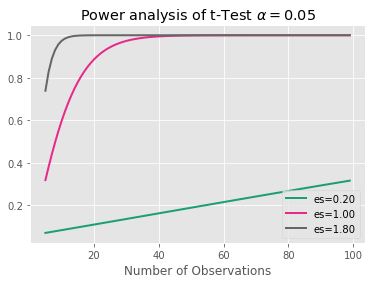

In [70]:
diagram = plt.figure()
diagram= TTestIndPower().plot_power(dep_var='nobs',nobs= np.arange(5, 100),effect_size=np.array([0.2, 1.0, 1.8]),alpha=0.06,title='Power analysis of t-Test ' + r'$\alpha = 0.05$')

plt.show()